<h1>Logistics Regression (Classification) </h1>
<p>
Trying to sparate the classes by line or Curve using Gradient Descent Algorithm

Read More at

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools

Logistic regression is one of ways to fit models for categorical data,
especially for binary response data. It is the most important 
 member of a class of models called generalized linear models(GLM). 
Unlike linear regression, logistic regression can directly predict probabilities 
i.e. values that are restricted to the (0,1) interval.

To explain the idea behind logistic regression as a probabilistic model, let's first introduce the odds ratio, which is the odds in favor of a particular event. 

Odd Ratio = Chance of success to odds = $\displaystyle \frac{P(X)}{1-P(X)}$

The logistic regression model is dervied from the log-odds.

Log Odd= $\displaystyle log (\frac{P(X)}{1-P(X)})$



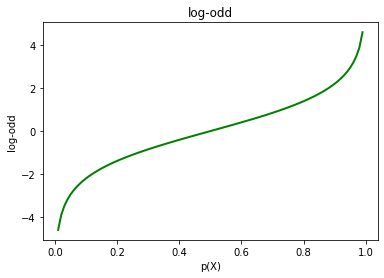

In [4]:
px = np.arange(0.01, 1, 0.01)
logodd=np.log(px/(1-px))
plt.plot(px, logodd,color='g' ,linewidth=2,alpha=1)
plt.xlabel('p(X)')
plt.ylabel('log-odd')
plt.title('log-odd')
plt.show()

Lets start with hypothesis we want to fit.

$\displaystyle log \frac{P(X)}{1-P(X)}= w_0+ \sum _{j=1}^k {w_j x_j}  $

$\displaystyle log \frac{P(X)}{1-P(X)}= \sum _{j=0}^k {b_j x_j}  $ where $x_0=1$


$\displaystyle \frac{P(X)}{1-P(X)}=e^{ \sum _{j=0}^k {b_j x_j}}  $ where $x_0=1$

we can also write it as

$\displaystyle  \frac{P(X)}{1-P(X)}= \prod_{j=0}^k e^{{b_j x_j}}$ that is why logistics is call multipicative or generative model.


we can also write it as

$\displaystyle  \frac{P(X)}{1-P(X)}= e^{h(x)}  $ as $h(x)= \sum _{j=0}^k {b_j x_j}$

$\displaystyle  P(X)= e^{h(x)} (1-P(X)) $

$\displaystyle  P(X)= e^{h(x)} -P(X) e^{h(x)} $

$\displaystyle  P(X)+P(X) e^{h(x)}= e^{h(x)}  $

$\displaystyle  P(X)(1+ e^{h(x)})= e^{h(x)}  $

$\displaystyle  P(X)= \frac{e^{h(x)}} {(1+ e^{h(x)})}  $

$\displaystyle  P(X)= \frac{1} {(1+ e^{-h(x)})}  $

$\displaystyle  P(X)= g(h(x))$  where $g(z)=\frac{1} {(1+ e^{-z})}$ is called sigmoid function  


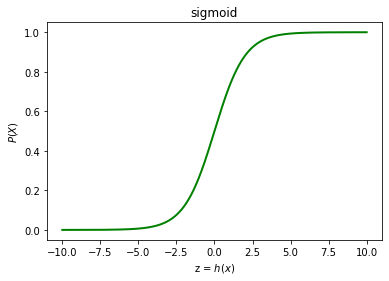

In [6]:
z = np.arange(-10, 10, 0.001)
px=(1/(1+np.exp(-z)))
plt.plot(z,px ,color='g' ,linewidth=2,alpha=1)
plt.xlabel('z = $h(x)$')
plt.ylabel('$P(X)$')
plt.title('sigmoid')
plt.show()

# Maximum likelyhood

Logistic Regression problem is the set of parameters w that maximizes the likelihood of the data, which is expressed as the product of the predicted probabilities of the N individual observations.


Therefore we can find the best solution by maximizing the combined probabilites in each class (0 or 1).

For class 1, combined probability will be $\prod P(x_i)$ where $y=1$

For class 0, combined probability will be $\prod (1-P(x_i))$ where $y=0$ since probabalities are less than 0.5   

Likelyhood is combined probability of all data points

$\displaystyle  Likelyhood()= \prod_{i=0;  where y_i=1}^k {P(X)} \prod_{i=0;  where y_i=0}^k {1-P(X)} $ 


##### Log-Likelyhood
Log likelyhood is log of Likelyhood function w.r.t to parameters W

Log-Likelyhood(W)=$\displaystyle    \sum_{i=0;  where y_i=1}^k {log (P(X))} + \sum_{i=0;  where y_i=0}^k {log(1-P(X))} $ 

Log-Likelyhood(W)=$\displaystyle    \sum_{i=0}^k {Y log(P(X))} + \sum_{i=0}^k {(1-Y)(1-(log(P(X)))} $

Log-Likelyhood(W)=$\displaystyle    \sum_{i=0}^k {Y log(\hat Y)} + \sum_{i=0}^k {(1-Y)(1-(log(\hat Y))} $ 

It is still maximization problem. To convert it to minmization we multiply it by -1

$\displaystyle    Loss(W)=-\sum_{i=0}^k {Y log(\hat Y) + (1-Y)(1-(log(\hat Y))} $ 



# Gradient Descent Algorithm (Logistics)
<p>
We start with assumpution equation (Called hypothesis) which can separte above data in two classes. 
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width=200 align="right" />
<p>
 
 $h(x) =w_0 + w_1 x_1+ w_2 x_2 $

 


 Let's define $g(z) =\displaystyle\frac{1}{1+e^{-z}}$
 
 where $g$ is called "sigmoid" or "logistics" function
</p>
The coefficients with initial guess (i.e. $w_0$, $w_1$...) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.
<p> We predict $\hat{Y}= 1$ if
    g($h(x))>=0.5$ i.e.  $h(x)>=0$ 
<p> We predict $\hat{Y}= 0$  if
    g($h(x))<0.5$ i.e. $h(x)<0$
<p>
 Our objective is to minimize Error in predicted values.
    <p>
 $ Error=   \hat{Y}-Y$  Where  $\hat{Y}=g(h(X))$
 </p>
Since Loss involve propablities between 0 and 1. we define loss function differently. we define Loss/Cost function as follows

<h3>Cost/Loss Function</h3>
Loss funnction is defined as
<p>$L(W) = \dfrac {-1}{n} \displaystyle \sum _{i=1}^n \left [ Y_{i} log(\hat{Y}_{i})+ (1-Y_{i}) log(1-\hat{Y}_{i}) \right]$
<p> and gradient update is same as it was in case of linear. 

$ W :=  W - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(\hat{Y} - Y)X $ 
    


<h1> Derivation of Logistics Loss Function and Gradient Updates

<h3>Cost/Loss Function(logistics)</h3>
<p>
<p>$h(x) =W^T X$  where $W^T X=w_0 + w_1 x+ w_2 y $
<p>$g(z) =\displaystyle\frac{1}{1+e^{-z}}$
<p>$\implies \hat{Y}=g(h(X))=g(W^T X)=\displaystyle\frac{1}{1+e^{-W^T X}}$


 <p>We calculate loss, 
      
   <p>$Loss= \begin{cases} 
              -\log(\hat{Y}) & Y=1 \\
              -\log(1- \hat{Y}) & Y=0
               \end{cases}$
 <p> Therefore we can simplify above discrete funciton into following loss function     
 <p>$L(W)=\frac{-1}{n} \displaystyle \sum_{i=1}^n[Ylog(\hat{Y}) +(1-Y)log(1-\hat{Y})]$

<h3>Derivative of Cost/Loss Function(logistics)</h3>
  <p>Now, 
      
   <p>$\log(\hat{Y})=\displaystyle\log(\frac{1}{1+e^{-W^T X} })$  
    <p> $\hspace{20mm}  =  -\log ( 1+e^{-W^T X} ) $
    
 <p> $\log(1- \hat{Y})=\displaystyle\log(1-\frac{1}{1+e^{-W^T X}})$
  <p>  $\hspace{25mm}=\displaystyle\log(\frac{e^{-W^T X}}{1+e^{-W^T X}})$
  <p>  $\hspace{25mm}=\log (e^{-W^T X} )-\log ( 1+e^{-W^T X} )$
  <p>  $\hspace{25mm}=e^{-W^T X}-\log ( 1+e^{-W^T X} )$
    <p>$L(W)=\frac{-1}{n} \displaystyle \sum_{i=1}^n[Ylog(\hat{Y}) +(1-Y)log(1-\hat{Y})]$
    <p> $\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[-Y(\log ( 1+e^{-W^T X})) + (1-Y)(-W^T X-\log ( 1+e^{-W^T X} ))\right]$    
 <p>$\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[YW^T X-W^T X-\log(1+e^{-W^T X})\right]$    
 <p>$\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[YW^T X-\log e^{W^T X}- \log(1+e^{-W^T X})\right]$  
      $\hspace{15mm}\text{using}\hspace{15mm} \log(e^{W^T X})  = W^T X $
 <p>$\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[YW^T X-\log(1+e^{W^T X})\right]$ 
    $\hspace{15mm}\text{using}\hspace{15mm} \log(X) + \log(Y) = log(X Y) $  


<p>$\frac{\partial}{\partial W} L(W)$
    $=\frac{\partial}{\partial W}(-YW^T X +\displaystyle\log(1+e^{W^T X}))$
   <p> $\hspace{20mm}=\frac{\partial}{\partial W}(-YW^T X) +\frac{\partial}{\partial W}(\log(1+e^{W^T X})))$
   <p> $\hspace{20mm}=-YX+\displaystyle\frac{e^{W^T X}}{1+e^{W^T X}} X$
    <p> $\hspace{20mm}=(-Y+\displaystyle\frac{e^{W^T X}}{1+e^{W^T X }}) X$
    <p> $\hspace{20mm}=(-Y+\displaystyle\frac{1}{1+e^{-W^T X }}) X$
    <p> $\hspace{20mm}=(-Y+\hat{Y}) X$
   <p>$ Finally$
    <p> $\implies\frac{\partial}{\partial W} L(W)=(\hat{Y}-Y) X$
    

# ***Importrant*** : 

Hypothesis Equation above is

$Y=W^T * X$ Where $ W=\left[ \begin{matrix} w_0   \\ w_1 \\ ...\\ w_k \end{matrix}\right]$ and $ X=\left[ \begin{matrix} 1   \\ x_1 \\ ...\\ x_k \end{matrix}\right]$  because X is vector representing single data point. 



But we use $ \hat Y=X W$ where $ X=\left[ \begin{matrix} 1   && x_{1_(1)} && ... && x_{k_(1)} \\
1   && x_{1_(2)} && ... && x_{k_(2)} \\
1   && ... && ... && ... \\
1   && x_{1_(n)} && ...&& x_{k_(n)} \end{matrix}\right]$ because here $X$ represent matrix for all Data points.





<H1>Data Generate

In [126]:
X1=[]
X2=[]
Y1=[]

for i,j in itertools.product(range(50),range(50)):
    if abs(i-j)>5 and abs(i-j)<40 and np.random.randint(5,size=1) >0:
        X1=X1+[i/2]
        X2=X2+[j/2]
        if (i>j):
            Y1=Y1+[1]
        else:
            Y1=Y1+[0]
            
X=np.array([X1,X2]).T
Y=np.array([Y1]).T

<h5> Visualize Data

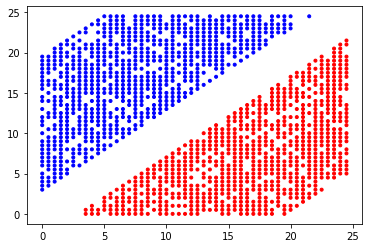

In [127]:
cmap = ListedColormap(['blue', 'red'])                    
plt.scatter(X1,X2, c=Y1,marker='.', cmap=cmap)
plt.show()

<h1>Training

In [128]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [129]:
def computeCost(weights,X,Y):
    n = Y.shape[0]
    hx=np.matmul(X,weights)                      #Hypothesis
    Y_hat=sigmoid(hx)
    term1=np.sum(np.multiply(Y,np.log(Y_hat)))
    term2=np.sum(np.multiply((1-Y),np.log(1-Y_hat)))    
    J=-(1/n)*(term1+term2)
    return J

<h5> Initialization

In [130]:
batchSize=Y.shape[0]        #no of Examples
iterations = 1000
alpha = 0.0001
featureCount=X.shape[1] 
weights=np.zeros((featureCount, 1)) #initialize Weight Paramters
dW=np.zeros((featureCount, 1))
lossList=np.zeros((iterations,1),dtype=float)  #for plotting loss curve

In [131]:
computeCost(weights,X,Y)


0.6931471805599452

<h5> Gradient Descent Updates

In [133]:

for k in range(iterations):
    
    #Hypothesis
    hx=np.matmul(X,weights)           
    
    Y_hat=sigmoid(hx)
    
    #Loss
    loss=Y_hat-Y  
    
    #derivative
    dW=np.matmul(X.T,loss)  #Derivative
    
    
    
    #gradient Update
    weights=weights - (alpha/batchSize)*dW                           #Simple
    
    #Compute Loss for Plotting
    lossList[k]=computeCost(weights,X,Y)

print("{0:.15f}".format(computeCost(weights,X,Y)))


0.178089322429175


<h1>Plot Loss

<function matplotlib.pyplot.show(*args, **kw)>

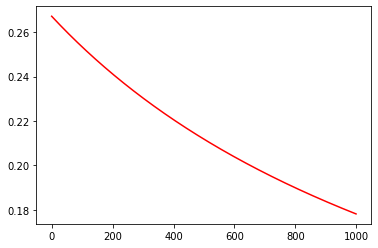

In [134]:
plt.plot(lossList,color='r')
plt.show

<h1> Prediction/Accuracy Evaluation

In [142]:
def predict(inputX,weights):
    fx=np.matmul(inputX,weights )
    hx=sigmoid(fx)
    PY=np.round(hx) 
    return PY


In [143]:
def accurracy(Y1,Y2):
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h5>Accurracy on Training Data

In [144]:
pY=predict(X) 
print(accurracy(Y, pY))

TypeError: predict() missing 1 required positional argument: 'weights'

In [145]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y, pY))

1.0


<h1>Plotting Hypothesis

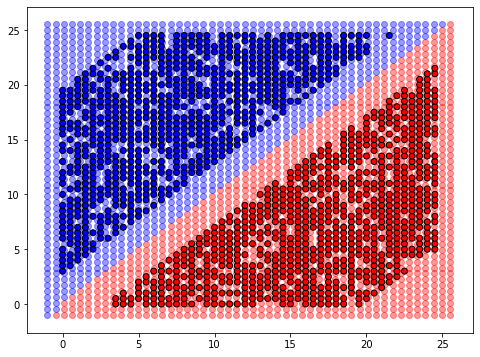

In [147]:
from matplotlib.colors import ListedColormap
myColorMap = ListedColormap(['blue', 'red'])                    

plt.figure(figsize=(8,6))
# Set min and max values and give it some padding
x1_min, x1_max = X[:,0].min() - 1, X[ :,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[ :,1].max() + 1

xx1 =np.linspace(x1_min, x1_max, 50)
xx2 =np.linspace(x2_min, x2_max, 50)
#Plot Prediction Data
for i in range(len(xx1)):
    for j in range(len(xx2)):
        newX=(np.column_stack((xx1[i],xx2[j])))
        newY=predict(newX, weights) 
        yColor=myColorMap(int(newY))
        plt.scatter(xx1[i].flatten(),xx2[j].flatten(),color=yColor,alpha=0.4);

#Plot Training data
plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=Y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()

##### Alernative use below Fast Method

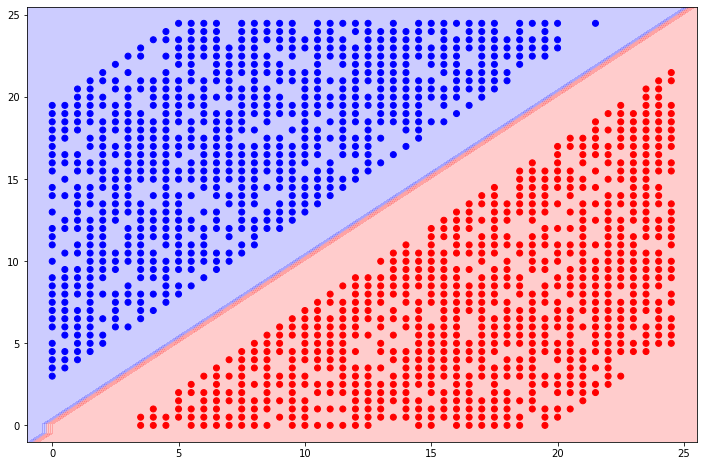

In [148]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=Y[:,0], cmap=cmap) 
###########################################################################
#Predict for each X1 and X2 in Grid 
x1_min, x1_max = X[:,0].min() - 1, X[ :,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[ :,1].max() + 1
u = np.linspace(x1_min, x1_max, 50) 
v = np.linspace(x2_min, x2_max, 50) 

U,V=np.meshgrid(u,v)
UV=np.column_stack((U.flatten(),V.flatten())) 
W=predict(UV, weights) 
W.shape=U.shape
###########################################################################
#Exact Decision Boundry can be plot with contour
plt.contourf(u, v, W, alpha=0.2,cmap=myColorMap)

plt.show()

<h3> Visualize Sigmoid for given Data points

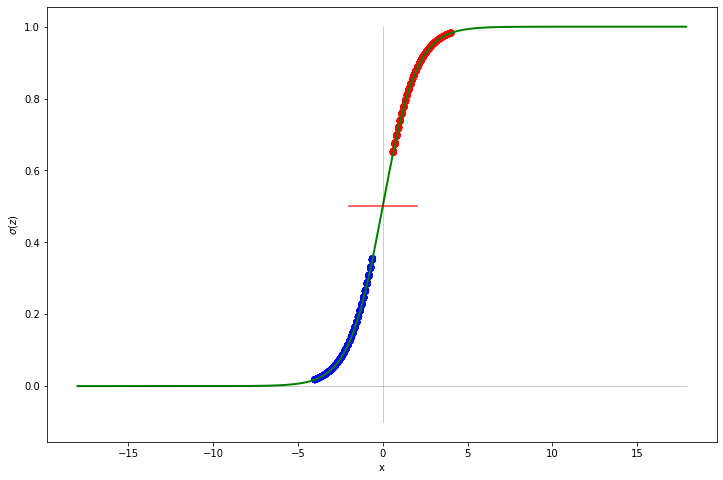

In [150]:

fx=np.matmul(X,weights)
hx=sigmoid(fx)
plt.figure(figsize=(12,8))
plt.scatter(fx,hx,c=np.round(hx), cmap=cmap)

x = np.arange(-18, 18, 0.1)
g = sigmoid(x)
plt.plot(x, g,color='g' ,linewidth=2,alpha=1)
plt.plot(x, x*0,color='k',linewidth=1,alpha=0.2)
plt.plot([-2,0,2], [0.5,0.5,0.5],color='r',alpha=0.8)
plt.plot([0,0], [-0.1,1],color='k',linewidth=1,alpha=0.2)
plt.xlabel('x')
plt.ylabel('$\sigma(z)$')
plt.show()